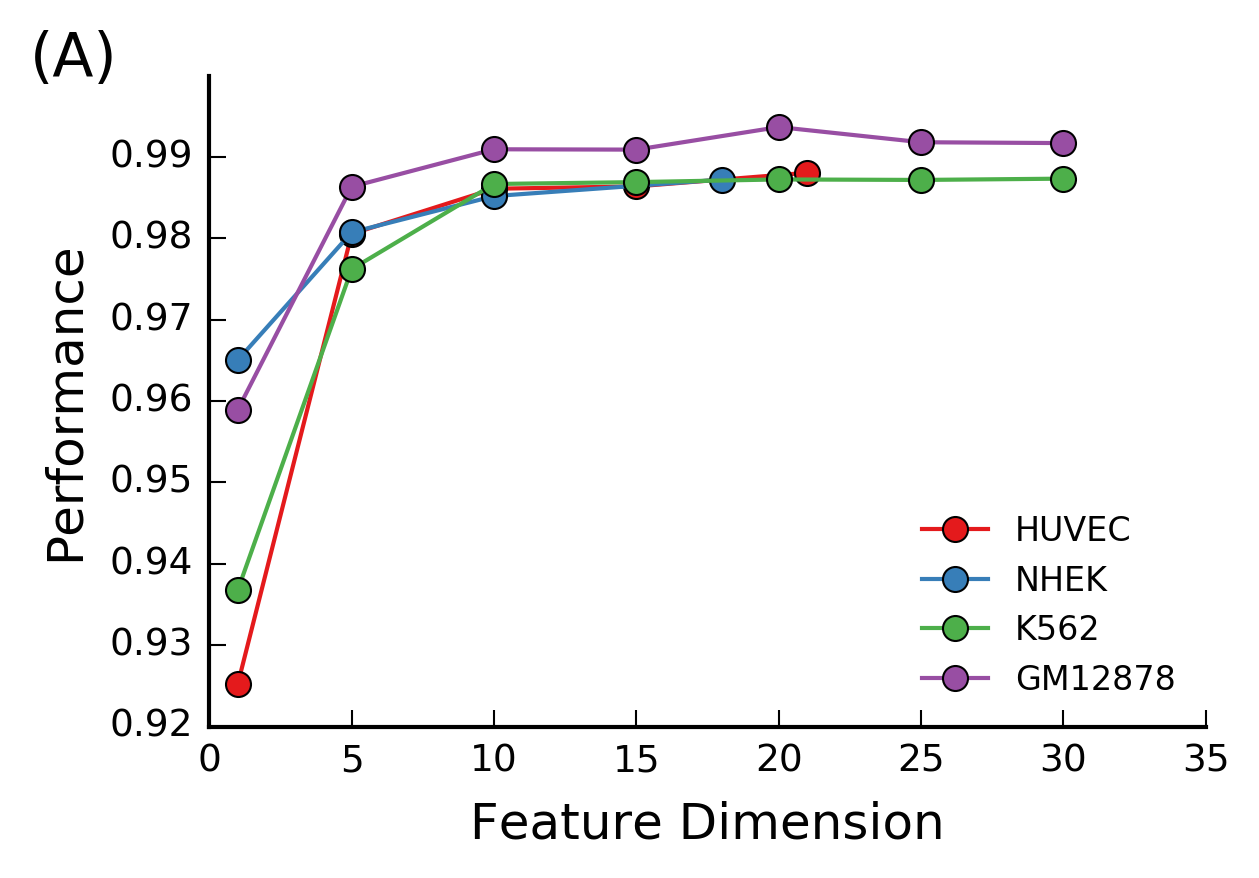

In [5]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import math 
plt.figure(figsize=(15,7), dpi=300,facecolor=(1, 1, 1))#平铺画布，figsize用来设置长宽
plt.subplots_adjust(wspace =0.25, hspace =0.5)#调整子图间距

ax =plt.subplot(231)
#data = pd.read_csv("C:\Users\Lenovo\Desktop\helper\GC_Enhancer.csv",header=None,index_col=None)
HUVEC_ROC = []
with open("./data/ROC_dotted_line/HUVEC_SVMcrossvalidationall_dimension_results.txt",'r') as f:#默认打开模式就为r
    data=f.readlines()
    for yy in data:
        if yy.startswith("[[["):
            HUVEC_ROC.append(float(yy.strip()[3:-3].split(",")[10]))#读取文件，进行文件处理，这一步需要自己实现
HUVEC_ROC = list(HUVEC_ROC)

            
NHEK_ROC = []
with open("./data/ROC_dotted_line/NHEK_SVMcrossvalidationall_dimension_results.txt",'r') as f:#默认打开模式就为r
    data=f.readlines()
    for yy in data:
        if yy.startswith("[[["):
            NHEK_ROC.append(float(yy.strip()[3:-3].split(",")[10]))#读取文件，进行文件处理，这一步需要自己实现
NHEK_ROC = list(NHEK_ROC)
            
K562_ROC = []
with open("./data/ROC_dotted_line/K562_SVMcrossvalidationall_dimension_results.txt",'r') as f:#默认打开模式就为r
    data=f.readlines()
    for yy in data:
        if yy.startswith("[[["):
            K562_ROC.append(float(yy.strip()[3:-3].split(",")[10]))#读取文件，进行文件处理，这一步需要自己实现
K562_ROC = list(K562_ROC)            
            
GM12878_ROC = []
with open("./data/ROC_dotted_line/GM12878_SVMcrossvalidationall_dimension_results.txt",'r') as f:#默认打开模式就为r
    data=f.readlines()
    for yy in data:
        if yy.startswith("[[["):
            GM12878_ROC.append(float(yy.strip()[3:-3].split(",")[10]))#读取文件，进行文件处理，这一步需要自己实现
GM12878_ROC = list(GM12878_ROC)



x_K562 = range(len(K562_ROC))


HUVEC_ROC = [str(i) for i in HUVEC_ROC]
NHEK_ROC = [str(i) for i in NHEK_ROC]
#x_K562 = [str(i) for i in x_K562]
GM12878_ROC = [str(i) for i in GM12878_ROC]


for i in range(len(K562_ROC)-len(HUVEC_ROC)):
    HUVEC_ROC.append("0")

for i in range(len(K562_ROC)-len(NHEK_ROC)):
    NHEK_ROC.append("0")

for i in range(len(K562_ROC)-len(GM12878_ROC)):
    GM12878_ROC.append("0")  

x_char = [] 
x_char_index=[] 
#x = range(len(GC_num)) 

for i in range((len(x_K562))): 
    x_char_index.append(i+1)
    x_char.append(float(i+1))
x_char = [i/100 for i in x_char]
x_K562=[i+1 for i in x_K562]



x_HUVEC_yuan = [1,5,10,15,21]
x_HUVEC_yuan_num =[HUVEC_ROC[0],HUVEC_ROC[4],HUVEC_ROC[9],HUVEC_ROC[14],HUVEC_ROC[21]]
x_NHEK_yuan = [1,5,10,18]
x_NHEK_yuan_num =[NHEK_ROC[0],NHEK_ROC[4],NHEK_ROC[9],NHEK_ROC[18]]
x_K562_yuan = [1,5,10,15,20,25,30]
x_K562_yuan_num = [K562_ROC[0],K562_ROC[4],K562_ROC[9],K562_ROC[14],K562_ROC[19],K562_ROC[24],K562_ROC[29]]
x_GM12878_yuan = [1,5,10,15,20,25,30]
x_GM12878_yuan_num =[GM12878_ROC[0],GM12878_ROC[4],GM12878_ROC[9],GM12878_ROC[14],GM12878_ROC[19],GM12878_ROC[24],GM12878_ROC[29]] 

plt.plot(x_HUVEC_yuan, x_HUVEC_yuan_num, marker='o',color='#e41a1c',label="HUVEC")
plt.plot(x_NHEK_yuan, x_NHEK_yuan_num, marker='o',color='#377eb8',label="NHEK")
plt.plot(x_K562_yuan, x_K562_yuan_num, marker='o',color='#4daf4a',label="K562")
plt.plot(x_GM12878_yuan, x_GM12878_yuan_num, marker='o',color='#984ea3',label="GM12878")


#plt.title("ROC",fontsize=12)#设置剃头了 
leg = plt.legend(numpoints=1, loc="lower right",fontsize=8)#设置legend的位置，这边表示右上
leg.get_frame().set_linewidth(0.0) 

#设置坐标轴范围 
plt.xlim([0, len(x_K562[:30])]) 
#设置x轴坐标 
plt.ylim((0.92, 1))#设置 y轴坐标

#设置坐标轴名称 
plt.ylabel('Performance',fontsize=12) 
#设置y轴标签 
plt.xlabel('Feature Dimension',fontsize=12)#设置x轴标签

#设置坐标轴刻度 
my_y_ticks = np.arange(0.92, 1.0, 0.01) 
plt.yticks(my_y_ticks,fontsize=9) 
#设置y轴刻度 
my_x_ticks = np.arange(0, len(x_K562[:30])+10,5) 
plt.xticks(my_x_ticks, fontsize=9)
#plt.xticks(my_x_ticks,fontsize=9)
#设置x轴刻度 
plt.text(-0.21*len(x_K562[:30])*1.0,1.0,'(A)',fontsize='x-large') #在文中写字
#在文中写字 
plt.tick_params(top='off', right='off', which='both') #关掉右边和上边的刻度线
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#plt.savefig('./ROC2.pdf',bbox_inches='tight')#不能跟plt.show同时用，可用来保存svg,pdf,tiff等格式